# Linear Regression


In [14]:
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Linear Regression with one variable

Linear regression assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

Now you will implement simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### 1.1 Load the dataset

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `X` and `Y`.

In [80]:
# Load dataset
df=np.genfromtxt('ex1data.txt',delimiter=',')

### 1.2 Plot the dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Execute the next cell to visualize the data.

Text(0, 0.5, 'Profit in $10,000')

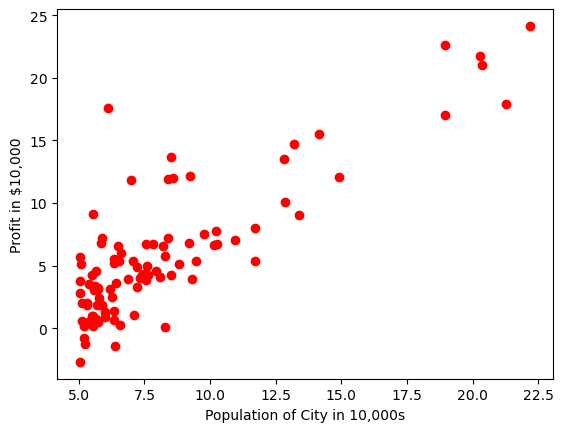

In [81]:
plt.scatter(df[:,0],df[:,1],color='r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000')

### 1.3 Learn the parameters
In this part, you will fit the linear regression parameters $\theta$ to the food truck dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 ------ (i)$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x ------ (ii)$$

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) ------ (iii)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(i)} ------ (iv)$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

Let's start by implementing the hypothesis $h_\theta(x)$.

In [82]:
def predict(x, theta0, theta1):
    h_x=theta0*theta1+x
    return h_x

In [83]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



Execute the next cell to verify your implementation.

In [ ]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



As you perform gradient descent to learn minimize the cost function  $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In [ ]:
def computeCost(X, Y, theta0, theta1):
    m=len(y)
    h=hypothesis(theta,X)
    error=h-y
    cost=(1/(2*m))*np.dot(error,error)
    return cost

In [ ]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

Execute the next cell to verify your implementation.

In [ ]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 10.27
Expected cost J = 10.27



Next, you will complete a function which implements gradient descent. The loop structure has been written for you, and you only need to supply the updates to parameters $\theta_j$  within each iteration (epoch).

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented `gradientDescent` and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [84]:
def gradientDescent(X, Y, alpha, n_epoch):
    m=len(y)
    costs=[]
    for i in range(num_iterations):
        h=hypothesis(theta,X)
        error=h-y
        gradient=(1/m)*np.dot(X.T,error)
        theta=theta-alpha*gradient
        costs.append(cost_function(theta,X,Y))
    return theta, costs

Execute the next cell to verify your implementation.

In [ ]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6361, theta1 = 1.1670, cost = 4.4831
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


### 1.4 Plot the linear fit

Use your learned parameters $\theta_j$ to plot the linear fit.

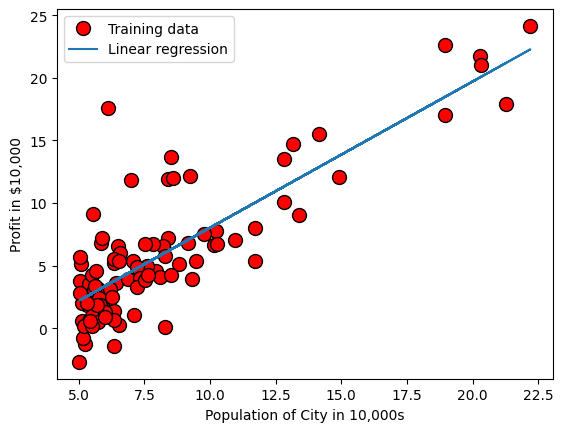

In [ ]:
# code here

### 1.5 Make predictions

Use your learned parameters $\theta_j$ to make food truck profit predictions in areas with population of 40,000 and 65,000.

In [ ]:
print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $10318.93
For population = 65,000, predicted profit = $39493.66


## 2. Multivariate Linear Regression

Now, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately.

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

In [88]:
train_X = np.loadtxt('ex2traindata.txt')
train_Y = np.loadtxt('ex2trainlabels.txt')
test_X = np.loadtxt('ex2testdata.txt')
test_Y = np.loadtxt('ex2testlabels.txt')

In [89]:
def normalize_features(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    normalized=(X-mean)/std
    return normalized,mean,std

In [90]:
train_X,train_X_mean,train_X_std=normalize_features(train_X)
test_X=(test_X-train_X_mean)/train_X_std

In [91]:
train_X=np.insert(train_X,0,1,axis=1)
test_X=np.insert(test_X,0,1,axis=1)

In [92]:
display(test_X.shape,test_X)

(102, 14)

array([[ 1.        ,  1.55369355, -0.48361547, ...,  0.78447637,
        -3.48459553,  2.25092074],
       [ 1.        , -0.39242675, -0.48361547, ..., -0.30759583,
         0.42733126,  0.47880119],
       [ 1.        , -0.39982927, -0.48361547, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [ 1.        , -0.20709507, -0.48361547, ..., -1.71818909,
         0.37051949, -1.49344089],
       [ 1.        , -0.36698601, -0.48361547, ..., -0.48960787,
         0.39275481, -0.41829982],
       [ 1.        , -0.0889679 , -0.48361547, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [93]:
def hypothesis(theta, X):
    return np.dot(X,theta)

In [94]:
# Cost function (mean squared error)
def cost_function(theta, X, y):
    m=len(y)
    h=hypothesis(theta,X)
    error=h-y
    cost=(1/(2*m))*np.dot(error,error)
    return cost

In [104]:
def gradient_descent(theta,X, y, alpha, num_iterations):
    m=len(y)
    costs=[]
    for i in range(num_iterations):
        h=hypothesis(theta,X)
        error=h-y
        gradient=(1/m)*np.dot(X.T,error)
        theta=theta-alpha*gradient
        costs.append(cost_function(theta,X,y))
    return theta, costs

In [107]:
num_features=train_X.shape[1]
initial_thetas=np.zeros(num_features)
learning_rate = 0.01
num_epoches = 1000
optimized_theta,costs=gradient_descent(initial_thetas,train_X,train_Y,learning_rate,num_epoches)
test_cost=cost_function(optimized_theta,test_X,test_Y)
print("Test Mean Squared Error:", test_cost)

Test Mean Squared Error: 11.274170183993435


In [ ]:
# Initialize theta with zeros
num_features=train_X.shape[1]
initial_thetas=np.zeros(num_features)
learning_rate = 0.01
num_iterations = 1000
optimized_theta,costs=gradient_descent(X_train,y_train,learning_rate,num_iterations)
print("Test Mean Squared Error:", test_cost)

Test Mean Squared Error: 11.274170183993437


## 3. Regularized Linear Regression

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [ ]:
''' Start your code of part 3 from here, add the new code cells as per your requirement. '''